In [1]:
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

Using backend: tensorflow.compat.v1

2023-05-15 14:53:33.485908: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
non-resource variables are not supported in the long term
Enable just-in-time compilation with XLA.



2023-05-15 14:53:35.631814: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-15 14:53:35.663877: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-15 14:53:35.664119: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [10]:
R = 2
n = 4
q = 1
epsilon = 1

In [11]:
def psi(x):
    ai_zeros, _, _, _ = sp.ai_zeros(n)
    alpha_n = ai_zeros[-1]
    E = -alpha_n * np.power((q ** 2) * (epsilon ** 2) / 2, (1 / 3))
    
    cube_root = np.power(2 * q * epsilon, (1 / 3))
    
    ai_value, _, _, _ = sp.airy(cube_root * (x - (E / (q * epsilon))))
    _, aip_value, _, _ = sp.airy(-cube_root * (E / (q * epsilon)))
    
    normalization_constant = np.sqrt(cube_root / (aip_value ** 2))
    
    return normalization_constant * ai_value

In [12]:
domain = dde.geometry.Interval(0, R)

In [13]:
num_train = 64
num_test = 100
data = dde.data.Function(domain, psi, num_train, num_test)

In [14]:
activation = 'tanh'
initializer = 'Glorot uniform'
net = dde.nn.FNN([1] + [50] * 5 + [1], activation, initializer)

In [15]:
model = dde.Model(data, net)
model.compile('adam', lr=0.001, metrics=['l2 relative error'])

Compiling model...
Building feed-forward neural network...
'build' took 0.144088 s

'compile' took 0.341813 s



2023-05-15 15:20:16.391379: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-15 15:20:16.391714: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-15 15:20:16.391957: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [16]:
loss_history, train_state = model.train(iterations=10000)

Initializing variables...
Training model...

Step      Train loss    Test loss     Test metric   
0         [1.75e-01]    [1.76e-01]    [1.27e+00]    
1000      [1.30e-05]    [1.25e-05]    [1.07e-02]    
2000      [6.65e-06]    [6.31e-06]    [7.59e-03]    
3000      [1.37e-06]    [1.30e-06]    [3.45e-03]    
4000      [5.75e-06]    [5.51e-06]    [7.09e-03]    
5000      [2.27e-07]    [2.11e-07]    [1.39e-03]    
6000      [5.83e-06]    [5.69e-06]    [7.21e-03]    
7000      [2.69e-07]    [2.52e-07]    [1.51e-03]    
8000      [2.95e-07]    [2.78e-07]    [1.59e-03]    
9000      [1.02e-05]    [9.87e-06]    [9.49e-03]    
10000     [4.72e-07]    [4.58e-07]    [2.04e-03]    

Best model at step 5000:
  train loss: 2.27e-07
  test loss: 2.11e-07
  test metric: [1.39e-03]

'train' took 11.929528 s



Saving loss history to /home/piotr/repos/quant-chem-pinns/potential-well/1d/triangle/loss.dat ...
Saving training data to /home/piotr/repos/quant-chem-pinns/potential-well/1d/triangle/train.dat ...
Saving test data to /home/piotr/repos/quant-chem-pinns/potential-well/1d/triangle/test.dat ...


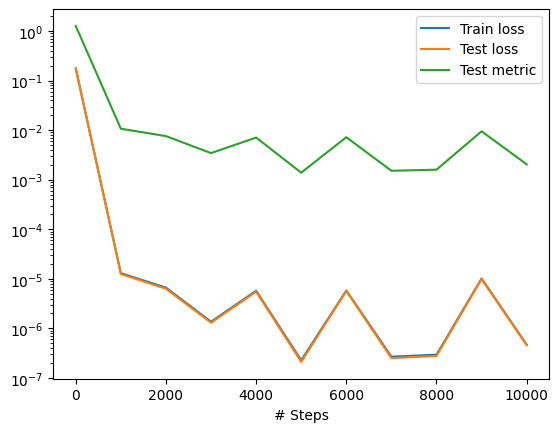

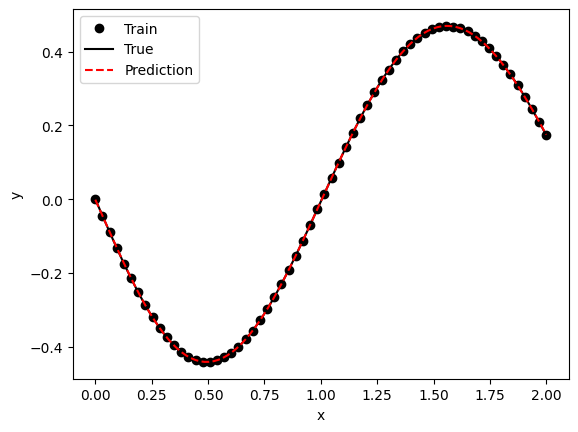

In [17]:
dde.saveplot(loss_history, train_state, issave=True, isplot=True)